<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [12]:
import boto3
import pandas as pd
# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [13]:
dataset = "part3_2"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data
data = pd.read_csv(dataset_url)
data = data.dropna()
data

message  temperature active                     __dt
0  Should cool down now         50.0   True  2022-11-13 00:00:00.000
1          Cooling down         30.0   True  2022-11-13 00:00:00.000
2                 Hello         20.0   True  2022-11-13 00:00:00.000
4         Active or not         10.0   True  2022-11-13 00:00:00.000
5         Active or not         10.0  False  2022-11-13 00:00:00.000
6         Active or not         10.0  False  2022-11-13 00:00:00.000
7         Active or not         10.0   True  2022-11-13 00:00:00.000
8         Active or not         10.0  False  2022-11-13 00:00:00.000
9         Active or not         10.0  False  2022-11-13 00:00:00.000

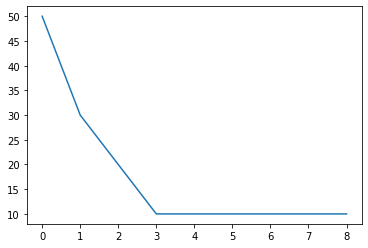

In [14]:
import matplotlib.pyplot as plt

def plot(y):
    x = list(range(0,len(data)))
    plt.plot(x, y)
    
plot(data["temperature"])

In [18]:
active_arr = []
for status in data["active"]:
    if status:
        active_arr.append(1)
    else:
        active_arr.append(0)
        
active_arr
plot(active_arr)

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>